In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import PIL
import urllib

In [4]:
import matplotlib.image as img

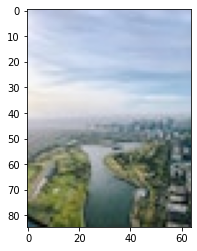

In [12]:
image = img.imread("city.jpg")
plt.imshow(image)

In [19]:
features = np.float32(image.reshape(-1,3))
df = pd.DataFrame(features)

In [40]:
N = df.shape[0]
K = 2
dim=2
r = np.zeros((N, K))
mu = np.zeros((K, dim), dtype=np.float64)

In [49]:
def init():
    global mu
    np.random.seed(1000000)
    for i in range(0, K):
       j = np.random.randint(0, N)
       mu[i,:] = df.iloc[j,:]

In [25]:
def Estep(mu, r):
    N = df.shape[0]
    K = mu.shape[0]
    for i in range(0, N):
        dist = np.zeros(K)
        for j in range(0, K):
            dist[j] = np.linalg.norm(np.array(df.iloc[i]) - mu[j])
        cluster = np.argmin(dist, axis=0)

        r[i] = np.zeros(K)
        r[i][cluster] = 1
    return r

In [34]:
def Mstep(mu, r):
    N = r.shape[0]
    K = r.shape[1]
    for j in range(0, K):
        count=0
        for i in range(N):
            count= count+ r[i][j]
        
        temp = np.zeros(mu.shape[1])
        for i in range(0, N):
            if r[i][j] == 1:
                temp += np.array(df.iloc[i])
        
        temp /= count
        mu[j] = temp
    return mu



def AssignClusters(r):
    N = r.shape[0]
    clusters = np.zeros(N)
    for i in range(0, N):
        clusters[i] = np.where(r[i] == 1)[0][0]
    clusters =  clusters.astype(np.int64)
    return clusters

In [69]:
print(np.where(r[200] == 1)[0])

[0]


In [29]:
def CostFn(mu, r):
    J = 0.0
    N = r.shape[0]
    for i in range(0, N):
        xi = np.array(df.iloc[i])
        clus_i = np.where(r[i] == 1)[0][0]
        dist = np.linalg.norm(xi - mu[clus_i])
        J += dist**2
    return J

In [45]:
def fx(x,p1,p2):
    return (p1[1]+p2[1])/2 - (x-(p1[0]+p2[0])/2)*((p2[0]-p1[0])/(p2[1]-p1[1]))

number of iterations required : 4


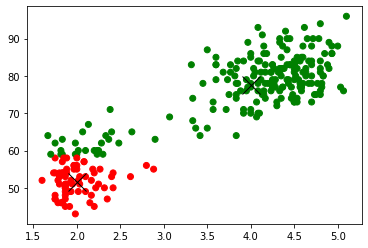

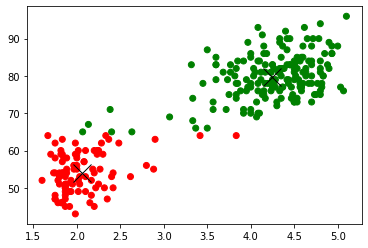

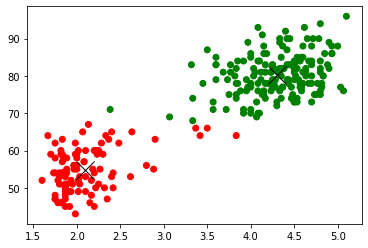

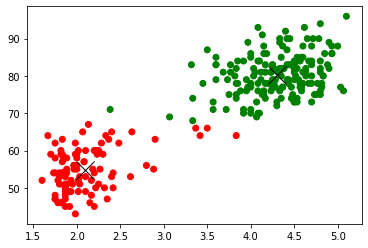

In [74]:
e = 0.000001
prev_mu = np.zeros((K, 2))
counter = 0
J = []
label_color=['r','b']
init()
while(np.linalg.norm(mu - prev_mu)>e):
    prev_mu=copy.deepcopy(mu)
    r = Estep(mu, r)
    J.append(CostFn(mu, r))    
    mu = Mstep(mu, r)
    J.append(CostFn(mu, r))    

    clusters = AssignClusters(r)
    
    plt.figure()
    colormap = np.array(['r', 'g'])
    plt.scatter(x=df['eruptions'], y=df['waiting'], c = colormap[clusters])
    
#     x = np.linspace(1.3,5)
#     y=fx(x,mu[1,:],mu[1,:])
#     plt.plot(x,y,label = ' random boundary')
    
    for i in range(0, K):
        plt.plot(mu[i][0], mu[i][1], marker="x",markersize=18, markeredgecolor="black")
    
    counter= counter+1
print("number of iterations required : %d" %counter)


In [58]:
J

[29093.63890099997, 10829.094209270334, 8992.735599758902, 8901.768720947211]

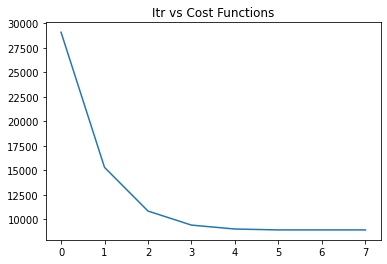

In [62]:
plt.plot(range(2*counter),J)
plt.title('Itr vs Cost Functions')
plt.show()

In [75]:
r

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.